<a href="https://colab.research.google.com/github/Pamgerber/Processamento_Imagens-M2/blob/main/Pratica1_Opera%C3%A7%C3%B5es_Pontuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí

Escola Politécnica

Processamento Digital de Sinais: Imagens

Professor Felipe Viel

M2- Pamela Bandeira Gerber e Ismar Pedrini

**Prática com Operações Pontuais e OpenCV**

Tutoriais da OpenCV


*   https://docs.opencv.org/master/d9/df8/tutorial_root.html
*   https://www.geeksforgeeks.org/opencv-python-tutorial/

**Conversão de imagem RGB em imagem Grayscale**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Abrindo a imagem
img = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png', 1)

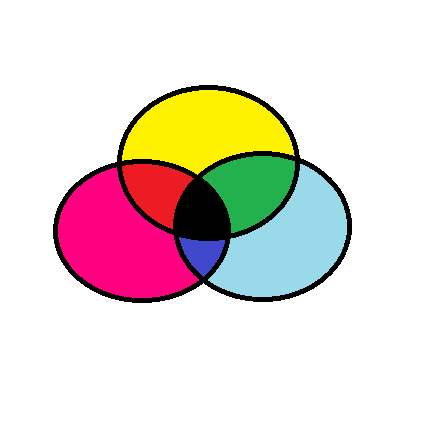

In [ ]:
# Mostrando a imagem colorida
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

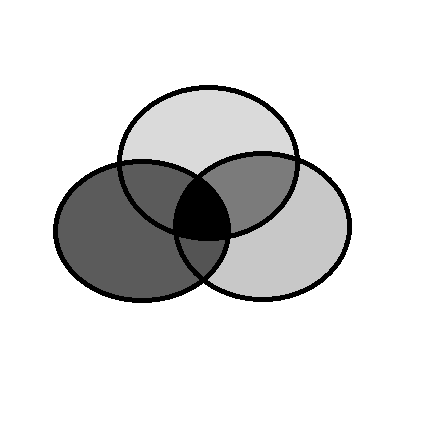

In [ ]:
# Aplicando conversão básica
# Numpy
img_grayscale_basic_np = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3

# Cv2
B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Converte o resultado para o tipo uint8
img_grayscale_basic_np = np.array(img_grayscale_basic_np, dtype=np.uint8)

# Plotagem
cv2_imshow(img_grayscale_basic_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

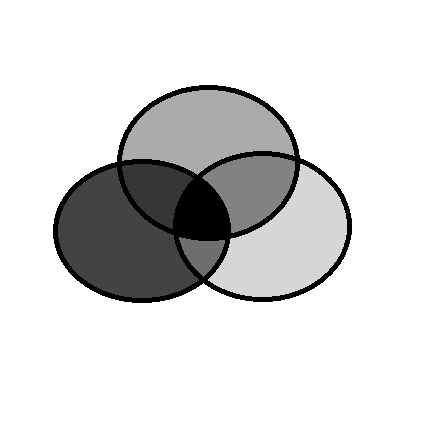

In [ ]:
# Aplicando conversão ponderada
img_grayscale_pondered_np = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

# Cv2
B, G, R = cv2.split(img)
img_grayscale_pondered_cv2 = 0.299 * R + 0.587 * G + 0.114 * B

# Converte o resultado para o tipo uint8
img_grayscale_pondered_np = np.array(img_grayscale_pondered_np, dtype=np.uint8)

# Plotando
cv2_imshow(img_grayscale_pondered_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Histograma de uma imagem**

Fazer o histograma de uma imagem

In [ ]:
# Calcula o histograma
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

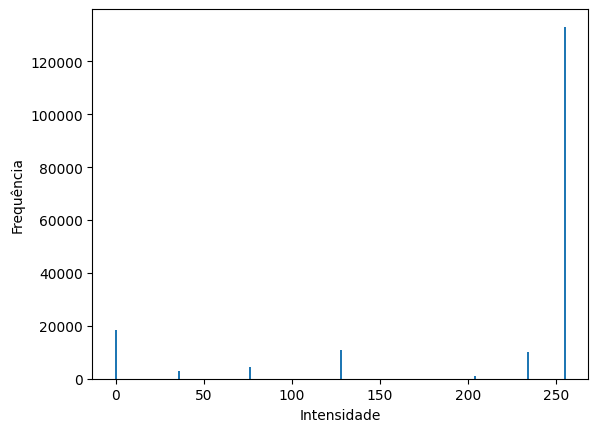

In [ ]:
x = np.linspace(0, 255, 256)

# Plotando
plt.bar(x, histogram[:, 0], width=1.0)
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.show()

Agora faça o histograma normalizado

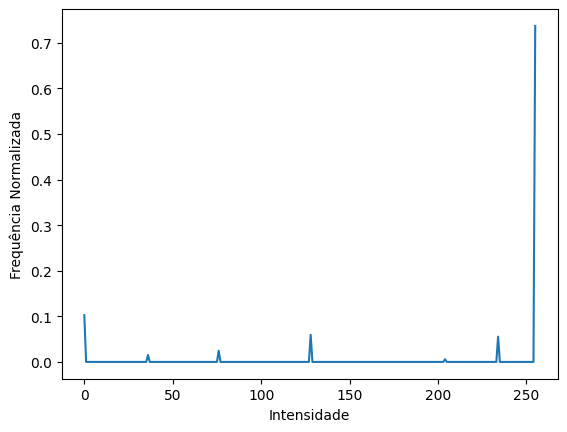

In [ ]:
histogram_normalized = histogram / histogram.sum()

# Array 'x' usando np.linspace representando as intensidades no eixo X
x = np.linspace(0, 255, 256)  # Supondo que seja uma imagem em tons de cinza de 8 bits

# Gráfico de linha
plt.plot(x, histogram_normalized)
plt.xlabel('Intensidade')
plt.ylabel('Frequência Normalizada')
plt.show()

**Transformações**

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas.

Imagem Original


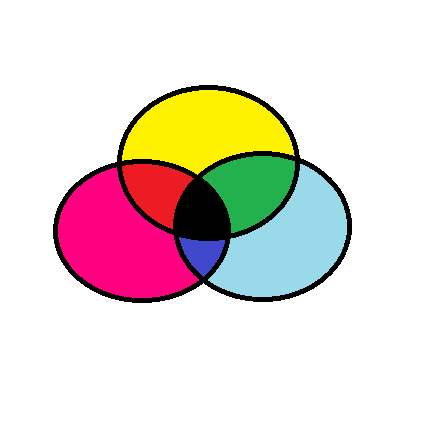

Imagem Nagativo


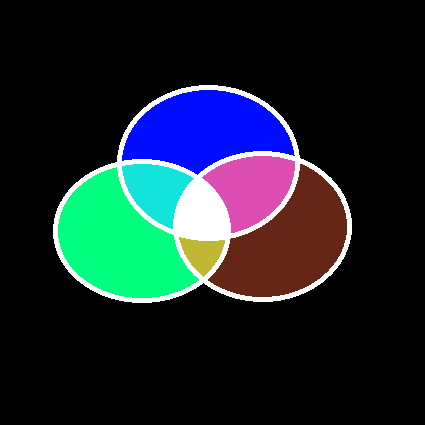

In [ ]:
#negativo

# Mude a variavel colorida para 1 caso queira colorida e 0 em escala de cinza
colorida = 1

img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png', 1)

# Calcula o negativo
img_negative_np = 255 - img_in

# Fiz um cast
img_out = img_negative_np.astype('uint8')

print("Imagem Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Imagem Nagativo")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

Valor máximo da imagem resultante: 255
Imagem Original


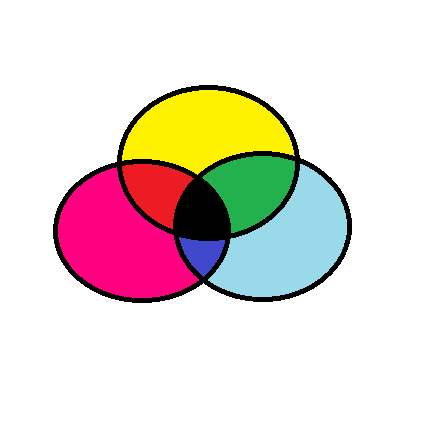

Imagem Logarítmica


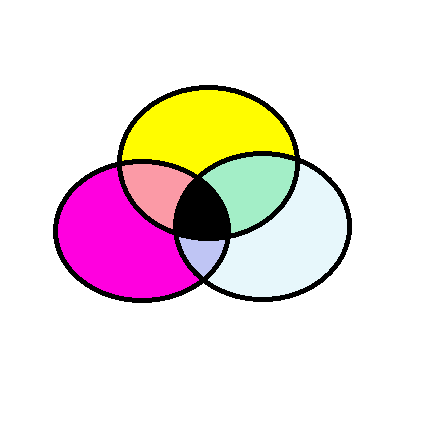

In [ ]:
#logaritimica

img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png')

c = 1

# Transformação logarítmica
img_out = c * np.log1p(img_in)

# Cast
img_out = (img_out / img_out.max() * 255).astype(np.uint8)

print("Valor máximo da imagem resultante:",img_out.max())
print("Imagem Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Imagem Logarítmica")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

Valor máximo da imagem resultante: 255
Original


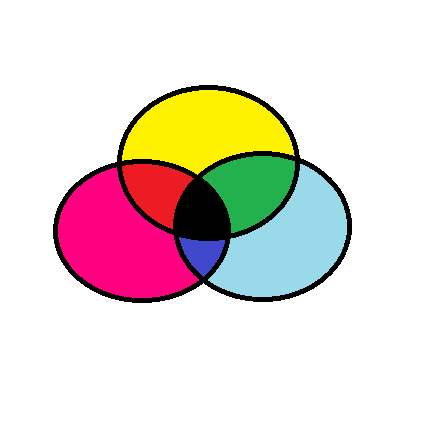

Gama


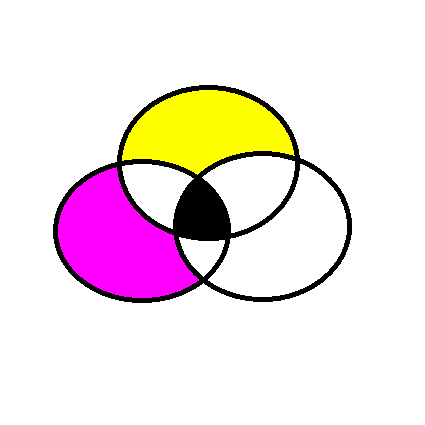

In [ ]:
img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png',1)

c = 20
gamma = 0.8

# Correção do gamma
img_out = c * (img_in ** gamma)

# Cast
img_out = np.clip(img_out, 0, 255).astype('uint8')


print("Valor máximo da imagem resultante:", img_out.max())
print("Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Gama")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

Original


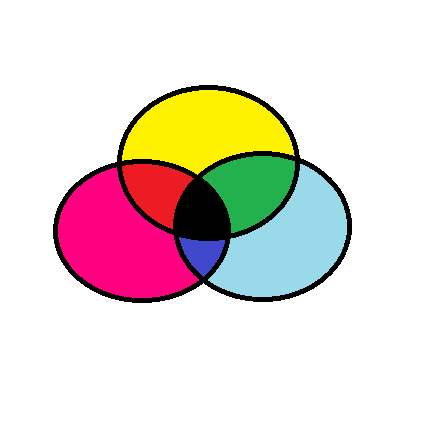

Alargamento de Contraste


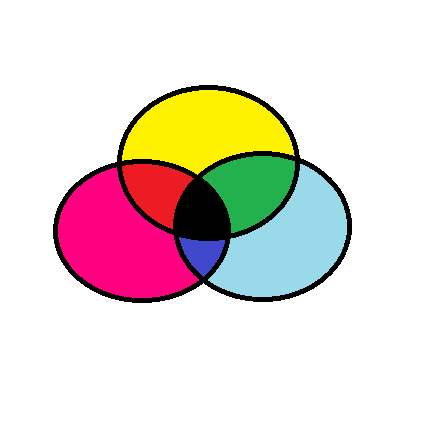

-1

In [ ]:
#alargamento de contraste
img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png',1)

# Número de iterações
num_iterations = 3

# Loop para aplicar o alargamento de contraste
for i in range(num_iterations):
    # Calcula o valor mínimo e máximo das intensidades
    min_intensity = np.min(img_in)
    max_intensity = np.max(img_in)

    # Novos valores mínimo e máximo
    new_min_intensity = 0
    new_max_intensity = 255

    # Transformação linear
    img_in = ((img_in - min_intensity) / (max_intensity - min_intensity)) * (new_max_intensity - new_min_intensity) + new_min_intensity

# Cast
img_out = img_in.astype('uint8')

print("Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Alargamento de Contraste")
cv2_imshow(img_out)
cv2.waitKey(0)

Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.

Original


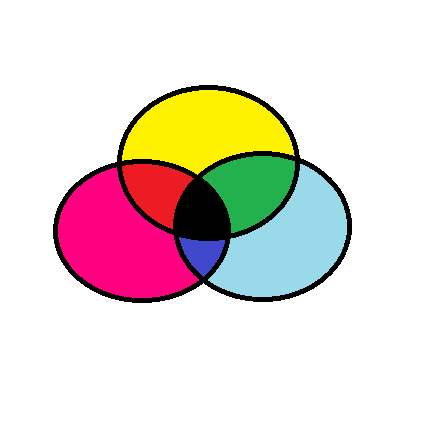

Contraste e Brilho


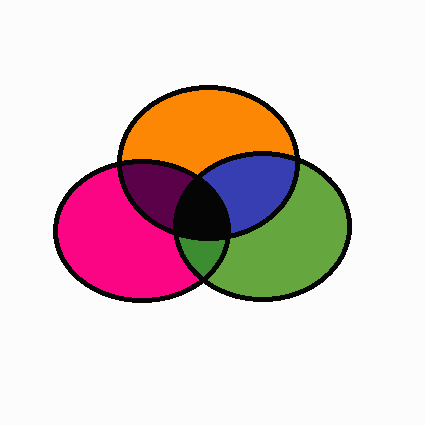

In [ ]:
#contraste e brilho

img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png',1)

a = 9  # Contraste
b = 5   # Brilho

img_out = a*img_in + b

# Cast
img_out = np.array(img_out, dtype = np.uint8)

print("Original")
cv2_imshow((img_in))
cv2.waitKey(0)
print("Contraste e Brilho")
cv2_imshow((img_out))
cv2.waitKey(0)

cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

Original


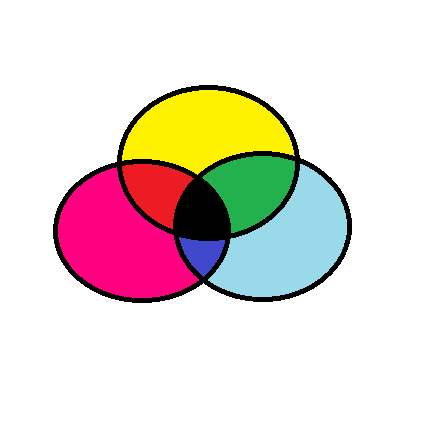

Limiarizacao


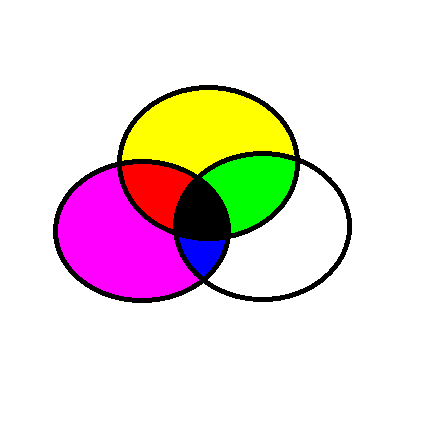

In [ ]:
#limiar
img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png')

# Valor de limiar
limiar = 127

# Transformação de limiarização separadamente
img_out = np.zeros_like(img_in)

for i in range(3):  # Loop através das 3 bandas
    img_out[:, :, i] = cv2.threshold(img_in[:, :, i], limiar, 255, cv2.THRESH_BINARY)[1]

# Cast
img_out = np.array(img_out, dtype = np.uint8)

print("Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Limiarizacao")
cv2_imshow(img_out)
cv2.waitKey(0)

cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas.

Original


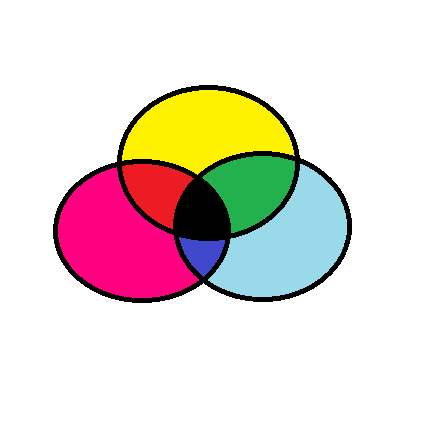

Limiarizacao com fatiamento de plano


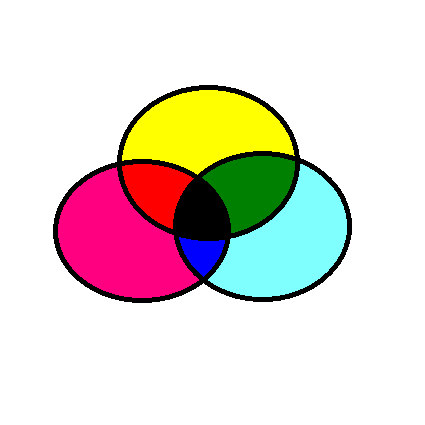

In [ ]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('/content/drive/MyDrive/Operacao_Pontual/circulos.png')

a = 100  # Limite inferior
b = 200  # Limite superior

num_iterations = 3  # Iterações

# Cópia da imagem original
img_out = img_in.copy()

# Loop
for i in range(num_iterations):
    img_out[img_out < a] = 0
    img_out[(img_out >= a) & (img_out < b)] = 128
    img_out[img_out >= b] = 255

# Cast
img_out = np.array(img_out, dtype = np.uint8)

print("Original")
cv2_imshow(img_in)
cv2.waitKey(0)
print("Limiarizacao com fatiamento de plano")
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()